`scikit-learn` makine öğrenmesi alanında Python için en yaygın kullanılan kütüphanelerden biri. Doğrusal regresyon, lojistik regresyon, karar ağaçları, rastgele orman gibi bir çok temel yöntemi içeren bu kütüphane Anaconda ile beraber geliyor. Anaconda kullanmayanlar [web](http://scikit-learn.org/) sitesinden kütüphaneyi nasıl yükleyeceklerini öğrenebilirler. 

`scikit-learn` paketinin bu kadar popüler olmasının birkaç sebebi var. Bunlardan ilki temel yöntemlerin büyük kısmını içermesi. Bu sayede veri analitiğine yeni başlayanlar hızla ellerini kirletebiliyorlar. İkinci olarak, `scikit-learn` sayesinde veri analitiği uygulamalarını baştan sona yürütmenizin mümkün olmasını sayabiliriz. Verideki eksikleri doldurmak, öznitelik seçmek, sonuçları değerlendirmek için ayrı ayrı modüller sayesinde başka bir pakete ihtiyacınız kalmıyor. `scikit-learn` paketinin en güzel yanı basit bir API'a sahip olması sayesinde uygulayacağınız farklı yöntemler için farklı syntaxlar öğrenmenizin önüne geçmesi. `fit/predict` ya da `fit/transform` fonksiyonları sayesinde kümeleme, regresyon, karar ağaçları gibi yöntemleri uygulamak, eksik değerleri doldurmak, veriyi ölçeklendirmek gibi çok farklı adımlarda aynı fonksiyonları kullanmak işinizi oldukça kolaylaştırıyor. API basit olmasının yanında çok iyi bir dokümantasyona sahip. 

`lightgbm`, `tensorflow` gibi kütüphaneler performans açısından ileride olsa da `scikit-learn` başlangıç seviyesindekiler için benim tavsiye edeceğim ilk kütüphane. Bu Veri Defteri'nde `scikit-learn` paketinin API'ını örnek üzerinden anlatıp, temel modüllerden bahsedeceğiz. Bu amaçla yine `scikit-learn` altındaki veri setlerini kullanacağız.

Örneği sınıflandırma üzerinden yapacağız. Bu amaçla `digits` veri setini kullanacağız. `digits` veri seti 10 rakamın piksel ($8 \times 8 = 64$) değerlerinden oluşuyor. Kaan Hoca bu veri setinden bir [yazısında](http://www.veridefteri.com/2017/11/03/yeni-baslayanlar-icin-veri-kumeleri-cicekler-bebekler-filmler/) bahsetmişti.  Veri setinde 3 ve 8 rakamlarını sınıflandırmaya çalışacağız. Kullanacağımız modülleri, veri setini yüklelim ve veri setini ikiye bölelim.

In [14]:
#Rakamlar veri setini yüklüyoruz.
from sklearn.datasets import load_digits
#numpy paketini yüklüyoruz.
import numpy as np
#Veri setini ikiye bölmek için
from sklearn.model_selection import train_test_split
#Resimleri incelemek için matplotlib kullanıyoruz.
%matplotlib inline
import matplotlib.pyplot as plt

#Veri setini etiket değerleriyle birlikte yükleyelim.
X,y = load_digits(return_X_y=True)
print('(Gözlem, öznitelik) = ' + str(np.shape(X)))
print('(Gözlem) = ' + str(np.shape(y)))

(Gözlem, öznitelik) = (1797, 64)
(Gözlem) = (1797,)


Veri seti 64 öznitelik (bunlar piksellerin değerlerine denk geliyor) ve 1797 gözlemden oluşuyor. Veri setinin ilk rakamını inceleyerek başlayalım. Rakamı çizdirmek için (1,64) olan boyutu (8,8) şeklinde değiştirmemiz gerekiyor. Bu amaçla da `numpy` altında `reshape` fonksiyonunu kullanacağız.

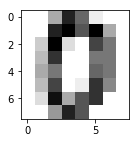

Etiket: 0


In [15]:
rakam1 = X[0]
rakam1 = np.reshape(rakam1, (8,8))

plt.figure(figsize= (2,2))
plt.imshow(rakam1, cmap="gray_r")
plt.show()
etiket1 = y[0]
print('Etiket: ' + str(etiket1))

Gördüğümüz gibi ilk rakam 0. Biz veri setindeki 3 ve 8 rakamlarını ayırmak istiyoruz. Bu amaçla filtreleme kullanacağız. Eğer bir rakam beşe bölündüğünde kalan üç ise istediğimiz koşulları sağlıyor.

In [16]:
#3 ve 8 rakamlarını seçmek için filtreleme kullanacağız.
#Filtrelemeyi etiket değerlerine (y) bakarak yapacağız. 
#Etiket değeri beşe bölündüğünde kalan üç ise bu gözlemleri veri setinde bırakıyoruz.
X= X[y%5 == 3]
y= y[y%5 == 3]

#Son olarak etiketleri 0 ve 1 değerlerine çevirelim.
#Rakam 3 ise etiket 0, 8 ise 1 olacak.
y = (y==8)*1

Modelleri test etmek için veri setini train ve test olarak ikiye bölelim. Bu da `scikit-learn` altında yapılabilecek bir işlem. Burada dikkat etmemiz gereken, veri setini bölerken etiketlerin yüzdelerini korumak. Bunun için de ekiket değerlerini de hesaba katarak bölmemiz gerekiyor. `stratify` argümanı bunu sağlıyor.

In [17]:
#Stratify değeri veri setinin etiket yüzdelerini korumak için kullanılıyor.
#Train veri setini küçük tutarak sonuçların çok iyi olmasını engelliyoruz.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, test_size = 0.5, random_state = 0, stratify = y)

print('(Gözlem, öznitelik) = ' + str(np.shape(X_train)))
print('(Gözlem, öznitelik) = ' + str(np.shape(X_test)))

(Gözlem, öznitelik) = (178, 64)
(Gözlem, öznitelik) = (179, 64)


Veri setini ikiye böldük. Şimdi sınıflandırma için karar ağacı ve rastgele orman yöntemlerini kullanıp karşılaştıralım. Bundan önce `scikit-learn` API'ndan bahsedelim. `scikit-learn`de yapacağınız birçok işlem için üç adımlık bir kullanım var.

## Kullanacağınız sınıfa ait bir örnek oluşturma

Örnek olarak bir karar ağacı oluşturmak ya da eksik değerleri ortalama değerle doldurmak istiyorsunuz. Bu amaçla gerekli sınıflara (class) ait örnekleri istediğiniz parametrelerle oluşturmanız gerekiyor..

Örnek olarak `dt` adında bir karar ağacı oluşturmak için `DecisionTreeClassifier` sınıfını kullanıyoruz: 

`dt = DecisionTreeClassifier()`

Eksik değerleri ortalama değerle değiştirmek için ise `Imputer` sınıfını kullanacağız. `NaN` şeklinde olan eksik değerleri ortalama (mean) değerle değiştirmek istediğimiz için bunu da argümanlarla belirtiyoruz:

`mean_imputer = Imputer(missing_values = 'NaN', strategy = 'mean')` 

Aşağıda `dt` adında bir karar ağacı ve `rf` adında bir rastgele orman örneği tanımlıyoruz.

In [18]:
#Karar ağaçları
from sklearn.tree import DecisionTreeClassifier
#Rastgele orman
from sklearn.ensemble import RandomForestClassifier

#Karar ağacı modelini oluşturalım
dt = DecisionTreeClassifier()

#Rastgele orman modelini oluşturalım.
rf = RandomForestClassifier()

## Oluşturduğumuz örneğin öğrenmesini sağlama (`fit`)

Bir önceki aşamada oluşturduğumuz örneğin veri üzerinde eğitilmesi `fit` fonksiyonuyla yapılır. Örnek olarak bir karar ağacını öznitelik ve etiketleri kullanarak eğitmek için `fit` fonksiyonunu aşağıdaki gibi kullanabiliriz:

`dt.fit(X_train, y_train)`

Bu sayede öğrenme verisi üzerinden bir karar ağacı modeli oluşturulur. Eksik değerleri doldurmak için de `fit` fonksiyonunu kullanacağız. Ancak burada `fit` fonksiyonu yapacağımız işlemi tanımlıyor, herhangi bir değer döndürmüyor. Örnek olarak, aşağıdaki satırda `X_train` matriksindeki eksik değer içeren sütunlar için ortalama değeri hesaplıyor.

`mean_imputer.fit(X_train)` 

Şimdi yukarıda oluşturduğumuz karar ağacı ve rastegele orman modellerini eğitelim.

In [19]:
#Modellerii eğitelim
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Sonuçları elde etmek (`predict`/`predict_proba` ve `transform`)

Oluşturduğunuz modelleri eğittikten sonra sonuçları elde etmek için kullanabileceğiniz iki farklı fonksiyon tipi var.

* `predict`: Regresyon, sınıflandırma, kümeleme gibi yöntemler kullanarak yapacağınız çalışmalarda tahmin edilen etiket bilgisini `predict` fonksiyonuyla elde edebiliirsiniz. Sınıflandırma problemlerinde gözlemlerin sınıflara ait olma olasılıklarını elde etmek istiyorsanız `predict_proba` fonksiyonunu kullanmanız gerekiyor.

Yukarıda oluşturduğumuz karar ağacı için etiketleri elde etmek için aşağıdaki satıra ihtiyacımız var:

`y_pred = dt.predict(X_test)`

Eğer etiketleri değil de olasılıkları öğrenmek istiyorsak `predict_proba` fonksiyonunu kullanmamız gerekiyor.

`y_pred_proba = dt.predict_proba(X_test)`

* `transform`: Veriyle ilgili yapacağımız dönüştürme işlemlerinde ise `transform` fonksiyonunu kullanacağız. Dönüştürme işlemleri eksik veriyi doldurma, veriyi ölçeklendirme gibi alanlarda karşımıza çıkıyor. Aynı zamanda bir matriksi çarpanlarına ayırmak gibi işlemler için de `transform` fonksiyonu kullanılıyor.

Eksik değerleri doldurmak için aşağıdaki satırı kullanabiliriz:

`X_test = mean_imputer.transform(X_test)`

Şimdi kullandığımız iki modeli test veri setinde kullanarak etiketleri ve gözlemlerin etiketlere ait olma olasılıklarını hesaplayalım. 

In [20]:
#Test verisinin etiketlerini elde edelim
y_pred_dt = dt.predict(X_test)
#Test veri setinin sınıflara ait olma olasılıklarını alalım.
y_pred_proba_dt = dt.predict_proba(X_test)

#Aynı adımları rastgele orman yöntemi için tekrarlayalım.
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)

Burada dikkat etmemiz gereken bir nokta `fit` işlemlerini train, `predict` ve `transform` işlemlerini ise test veri seti üzerinden yapmaktır. Yapacağımız çalışmalardaki amacımız train veri setiyle yakaladığımız örüntüleri test veri setinde denemek. Eksik değerleri doldurmak gibi konularda da train veri setiyle elde ettiğimiz bilgileri (örnek olarak ortalamayı) test veri setinde kullanacağız. Sıklıkla yapılan bir hata test veri seti için de `fit` fonksiyonunu kullanmaktır.

Aşağıdaki satırlarda train veri setindeki sütunlar için ortalama değeri bulup eksik değerleri dolduruyoruz. Daha sonra da test veri setindeki sütunlar için ortalama değerleri bulup eksik değerleri doldurmak için kullanıyoruz. Oysa ki yapmamız gereken test veri setinde de train veri setindeki ortalamaları kullanmak.

`mean_imputer.fit(X_train)
X_train = mean_imputer.transform(X_train)
mean_imputer.fit(X_test)
X_test = mean_imputer.transform(X_test)`

# Sonuçları değerlendirmek ve yorumlamak

`scikit-learn` modellerin sonuçlarını değerlendirmek ve yorumlamak için de çeşitli araçlar sunuyor. Sonuçları değerlendirmek için isabetlilik (accuracy) ve eğri altı alan (area under curve) değerlerini kullanacağız. `metrics` modülünün altında farklı tipteki modelleri değerlendirmek için başka araçlar da var.

In [21]:
#Sonuçları değerlendirmek için aşağıdaki fonksiyonları kullanacağız.
from sklearn.metrics import roc_auc_score, accuracy_score
#İsabetlilik değeri için etiketlere ihtiyacımız var
print('Karar ağacı isabetlilik değeri: ' + str(accuracy_score(y_pred_dt, y_test)))
print('Rastgele orman isabetlilik değeri: ' + str(accuracy_score(y_pred_rf, y_test)))

#Eğri altı alan değeri için etiketlerin olasılıklarına ihtiyacımız var.
print('Karar ağacı eğri altı alan değeri: ' + str(roc_auc_score(y_test, y_pred_proba_dt[:,1])))
print('Rastgele orman eğri altı alan değeri: ' + str(roc_auc_score(y_test, y_pred_proba_rf[:,1])))

Karar ağacı isabetlilik değeri: 0.921787709497
Rastgele orman isabetlilik değeri: 0.966480446927
Karar ağacı eğri altı alan değeri: 0.922976011994
Rastgele orman eğri altı alan değeri: 0.996939030485


İsabetlilik değeri ve eğri altı değeri de rastgele orman yönteminde daha yüksek çıktı. 3 ve 8 rakamlarını ayırmamızı sağlayan öznitelikler (piksel değerleri) hangileri? Şimdi de `features_importances_` özelliğini kullanarak modellerin bulduğu önemli piksellere bakalım. 

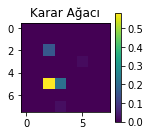

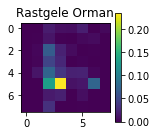

In [34]:
features_dt = dt.feature_importances_
features_rf = rf.feature_importances_

features_dt = np.reshape(features_dt, (8,8))
features_rf = np.reshape(features_rf, (8,8))


plt.figure(figsize=(2,2))
plt.imshow(features_dt)
plt.title('Karar Ağacı')
plt.colorbar()
plt.show()


plt.figure(figsize=(2,2))
plt.imshow(features_rf)
plt.title('Rastgele Orman')
plt.colorbar()
plt.show()


Önemli olan öznitelikler sarı ve açık mavi, önemsiz olanlarsa koyu mavi ile gösteriliyor. Karar ağaçları 3 piksele bakarken, rastgele orman yöntemi daha fazla piksele bakarak karar veriyor. İki yöntem de ağırlıklı olarak resmin sol tarafına bakıyor, yani resimlerin sol tarafı 3 ve 8 rakamlarını ayırmak önemli olan pikselleri içeriyor.

# Diğer Modüller

Bu Veri Defteri'nde sınıflandırma algoritmalarına bakmış olsak da `scikit-learn` altında başka modüller de var. Bunlardan sıklıkla kullanılanları aşağıda bulabilirsiniz:

* `cluster`: Bu modül başta k-ortalamalar algoritması olmak üzere çeşitli kümeleme algoritmalarını içeriyor.
* `ensemble`: Adaboost, gradient boosting ve rastgele orman gibi grup halinde (ensemble) tahmin yapan yöntemleri içeriyor.
* `feature_selection`: Öznitelik seçme/azaltma yöntemlerini içeriyor.
* `linear_model`: Başta doğrusal regresyon ve lojistik regresyon olmak üzere doğrusal yöntemleri içeriyor. Bu modül altında genelde regresyon yöntemleri bulunuyor.
* `metrics`: Regresyon, sınıflandırma ve kümeleme problemlerinde elde ettiğiniz sonuçları değerlendirmek için kullanabileceğiniz araçları içeren bir modül.
* `model_selection`: Çapraz doğrulama (cross-validation) ve veri setini bölmek için kullanabileceğiniz bir modül.
* `neighbors`: Gözlemlerin birbirine yakınlığı üzerinden sınıflandırma ve regresyon uygulayan yöntemleri (k en yakın komşu yöntemi gibi) bir modül.
* `neural_network`: Yapay sinir ağları üzerinden denemeler yapabileceğiniz bir modül. Ciddi bir çalışma gerçekleştirmek için başka paketlere ihtiyaç duyabilirsiniz.
* `preprocessing`: Veri üzerinde ölçeklendirme, eksik değerleri doldurma ve kategorik değişkenleri ikili değerlere çevirmek gibi işlemleri yapabileceğiniz bir paket.
* `svm`: Destek vektör makineleri paketi.
* `tree`: Karar ağaçları paketi.


